## Business Summary 
A consumer bank with a range of products would like to cross-sell insurance to its consumer base (that is, cross-sell the personal protection insurance (PPI) product to those customers who have a secured or unsecured type of loan, but no PPI product as yet). 

Attached is a sample data set from their customer portfolio containing various fields about their product ownership, credit standing, outstanding amounts, and whether they already have an insurance product (called as PPI / personal protection insurance), if any, the type of PPI product they own.
The bank would like to adopt analytics driven approach applied on this sample data for deciding:
-	Who should they target from the pool of customers that currently do not have a PPI, and 
-	What type of PPI product they should be targeting them with..



In [1439]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [1441]:
from IPython.core.display import display, HTML
display(HTML('<style>.container{width:80% !important;}</style>'))

In [1308]:
## Import Packages
import pandas as pd, numpy as np, pprint, sklearn
import scipy.stats.stats as stats
import sklearn.preprocessing
# import helperFunctions as hf
import plotly.express as px
# from modelCompare import *
import networkx as nx
import collections

import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif,SelectKBest,SelectPercentile


import matplotlib.pyplot as plt
%matplotlib inline


In [1309]:
## Read data - excel file
data = pd.read_excel('C:/Users/supra/Desktop/Dataset.xls')
data.shape

(16383, 59)

In [1310]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',200)

In [1311]:
data.columns

Index(['Ref', 'Credit_Score', 'Final_Grade', 'Term', 'Net_Advance', 'APR',
       'Loan_Type', 'Mosaic', 'Mosaic_Class', 'Time_at_Address',
       'Residential_Status', 'Telephone_Indicator', 'Number_of_Dependants',
       'Marital_Status', 'Gender', 'Time_in_Employment', 'Employment_Status',
       'Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind', 'Income_Range',
       'Current_Account', 'ACCESS_Card', 'VISA_Card', 'American_Express',
       'Diners_Card', 'Cheque_Guarantee', 'Other_Credit_Store_Card',
       'Time_with_Bank', 'Value_of_Property', 'Outstanding_Mortgage_Bal',
       'Total_Outstanding_Balances', 'Bureau_Data___Monthly_Other_Co_R',
       'Worst_History_CT', 'Payment_Method', 'Age',
       'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban',
       'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In',
       'Total_value__CAIS_8_9s', 'Worst_status_L6m', 'Worst_CUrrent_Status',
       '__of_status_3_s_L6m', 'Searches___Total___L6m', '

In [1312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               16383 non-null  int64  
 1   Credit_Score                      16383 non-null  int64  
 2   Final_Grade                       16383 non-null  object 
 3   Term                              16383 non-null  int64  
 4   Net_Advance                       16383 non-null  float64
 5   APR                               16383 non-null  float64
 6   Loan_Type                         16383 non-null  object 
 7   Mosaic                            16383 non-null  int64  
 8   Mosaic_Class                      16383 non-null  int64  
 9   Time_at_Address                   16383 non-null  int64  
 10  Residential_Status                16383 non-null  object 
 11  Telephone_Indicator               16383 non-null  object 
 12  Numb

In [1313]:
var_count = data.dtypes.reset_index()
var_count['Type'] = np.where(var_count.loc[:, 0].astype(str).isin(['int64', 'float64']), 'Numerical', 'Categorical')
var_count.groupby('Type').size()

Type
Categorical    22
Numerical      37
dtype: int64

In [1314]:
data.isnull().sum()

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

In [1315]:
data.isnull().sum().sum()

27860

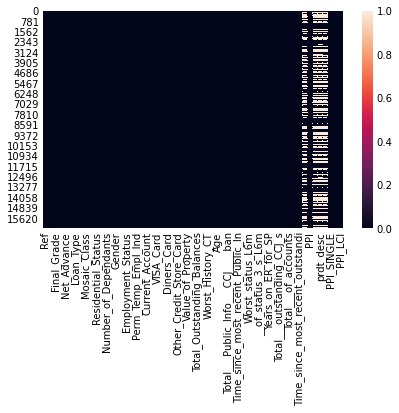

In [1316]:
sns.heatmap(data.isnull())
plt.show()

In [1317]:
num_var = data.select_dtypes(include='number')

In [1318]:
num_var.head(2)

Ref  Credit_Score  Term  Net_Advance   APR  Mosaic  Mosaic_Class  \
0    1           918    36       3000.0  14.4      46             8   
1    3           903   120      21000.0   7.9      16             3   

   Time_at_Address  Number_of_Dependants  Time_in_Employment  Income_Range  \
0              132                     0                 288             6   
1              288                     0                  37             2   

   Time_with_Bank  Value_of_Property  Outstanding_Mortgage_Bal  \
0             168             178000                     47679   
1             300             180000                     11563   

   Total_Outstanding_Balances  Bureau_Data___Monthly_Other_Co_R  \
0                       64406                               513   
1                       31614                               331   

   Worst_History_CT  Age  Total_outstanding_balance__mortg  \
0                 5   46                                64   
1                 5   59                                13   

   Total___Public_Info___CCJ____ban  Total_value__Public_Info___CCJ__  \
0                                 1                                 5   
1                                 0                                 0   

   Time_since_most_recent_Public_In  Total_value__CAIS_8_9s  Worst_status_L6m  \
0                                16                       0                 0   
1                                99                       0                 1   

   Worst_CUrrent_Status  __of_status_3_s_L6m  Searches___Total___L6m  \
0                     0                    0                       9   
1                     0                    0                       6   

   Years_on_ER_for_SP  Total___outstanding_CCJ_s  \
0                  10                          1   
1                  22                          0   

   Total_outstanding_balance___excl  Total___of_accounts  \
0                                18                    6   
1                               203                    8   

   Time_since_most_recent_outstandi  PPI   code  PPI_SINGLE  PPI_JOINT  \
0                                16    0    NaN           0          0   
1                                99    1  748.0           0          0   

   PPI_LCI  
0        0  
1        1

In [1319]:
# EDA of Numberic Columons
num_var.describe().transpose()

count           mean            std  \
Ref                               16383.0   21168.695294   12142.797527   
Credit_Score                      16383.0     882.061832      93.149605   
Term                              16383.0      59.142892      26.689123   
Net_Advance                       16383.0    7364.007758    6673.343595   
APR                               16383.0      18.754587       9.662504   
Mosaic                            16383.0      29.419703      16.718957   
Mosaic_Class                      16383.0       5.352683       5.130278   
Time_at_Address                   16383.0     120.488128     109.192185   
Number_of_Dependants              16383.0       0.808460       1.118947   
Time_in_Employment                16383.0     103.096075      91.541972   
Income_Range                      16383.0       4.408716       1.668857   
Time_with_Bank                    16383.0     194.491119     107.144729   
Value_of_Property                 16383.0  166366.301288  118720.949422   
Outstanding_Mortgage_Bal          16383.0   70060.964842   83027.727917   
Total_Outstanding_Balances        16383.0   78214.242446   89423.501564   
Bureau_Data___Monthly_Other_Co_R  16383.0     601.941952     614.070641   
Worst_History_CT                  16383.0       2.692608       2.381330   
Age                               16383.0      44.100531      10.886422   
Total_outstanding_balance__mortg  16383.0      64.961607      82.041497   
Total___Public_Info___CCJ____ban  16383.0       0.205579       0.629787   
Total_value__Public_Info___CCJ__  16383.0       5.011231      42.609551   
Time_since_most_recent_Public_In  16383.0      90.182262      23.645068   
Total_value__CAIS_8_9s            16383.0      18.579747      63.096233   
Worst_status_L6m                  16383.0       0.798633       1.296641   
Worst_CUrrent_Status              16383.0       0.482757       1.138039   
__of_status_3_s_L6m               16383.0       0.326497       1.254672   
Searches___Total___L6m            16383.0       2.917659       2.398112   
Years_on_ER_for_SP                16383.0       6.572667       7.449055   
Total___outstanding_CCJ_s         16383.0       0.157602       0.540908   
Total_outstanding_balance___excl  16383.0     137.793628     145.935978   
Total___of_accounts               16383.0       5.984679       2.669217   
Time_since_most_recent_outstandi  16383.0      91.697308      22.092297   
PPI                               16383.0       0.577489       0.493974   
code                               9405.0     743.303243      24.283753   
PPI_SINGLE                        16383.0       0.382348       0.485976   
PPI_JOINT                         16383.0       0.074773       0.263032   
PPI_LCI                           16383.0       0.120369       0.325402   

                                    min       25%       50%       75%  \
Ref                                 1.0   10699.0   21303.0   31689.0   
Credit_Score                      352.0     818.0     882.0     947.0   
Term                                6.0      48.0      60.0      60.0   
Net_Advance                       500.0    3000.0    5300.0    9000.0   
APR                                 0.0       9.9      16.9      24.9   
Mosaic                              0.0      16.0      25.0      44.0   
Mosaic_Class                        1.0       3.0       4.0       8.0   
Time_at_Address                     1.0      38.0      84.0     180.0   
Number_of_Dependants                0.0       0.0       0.0       1.0   
Time_in_Employment                  0.0      38.0      72.0     144.0   
Income_Range                        0.0       3.0       5.0       6.0   
Time_with_Bank                      0.0     120.0     181.0     252.0   
Value_of_Property                   1.0  120000.0  125000.0  190000.0   
Outstanding_Mortgage_Bal            0.0       0.0   60000.0  107698.5   
Total_Outstanding_Balances          0.0    9255.5   59430.0  118656.0   
Bureau_Data___Mon

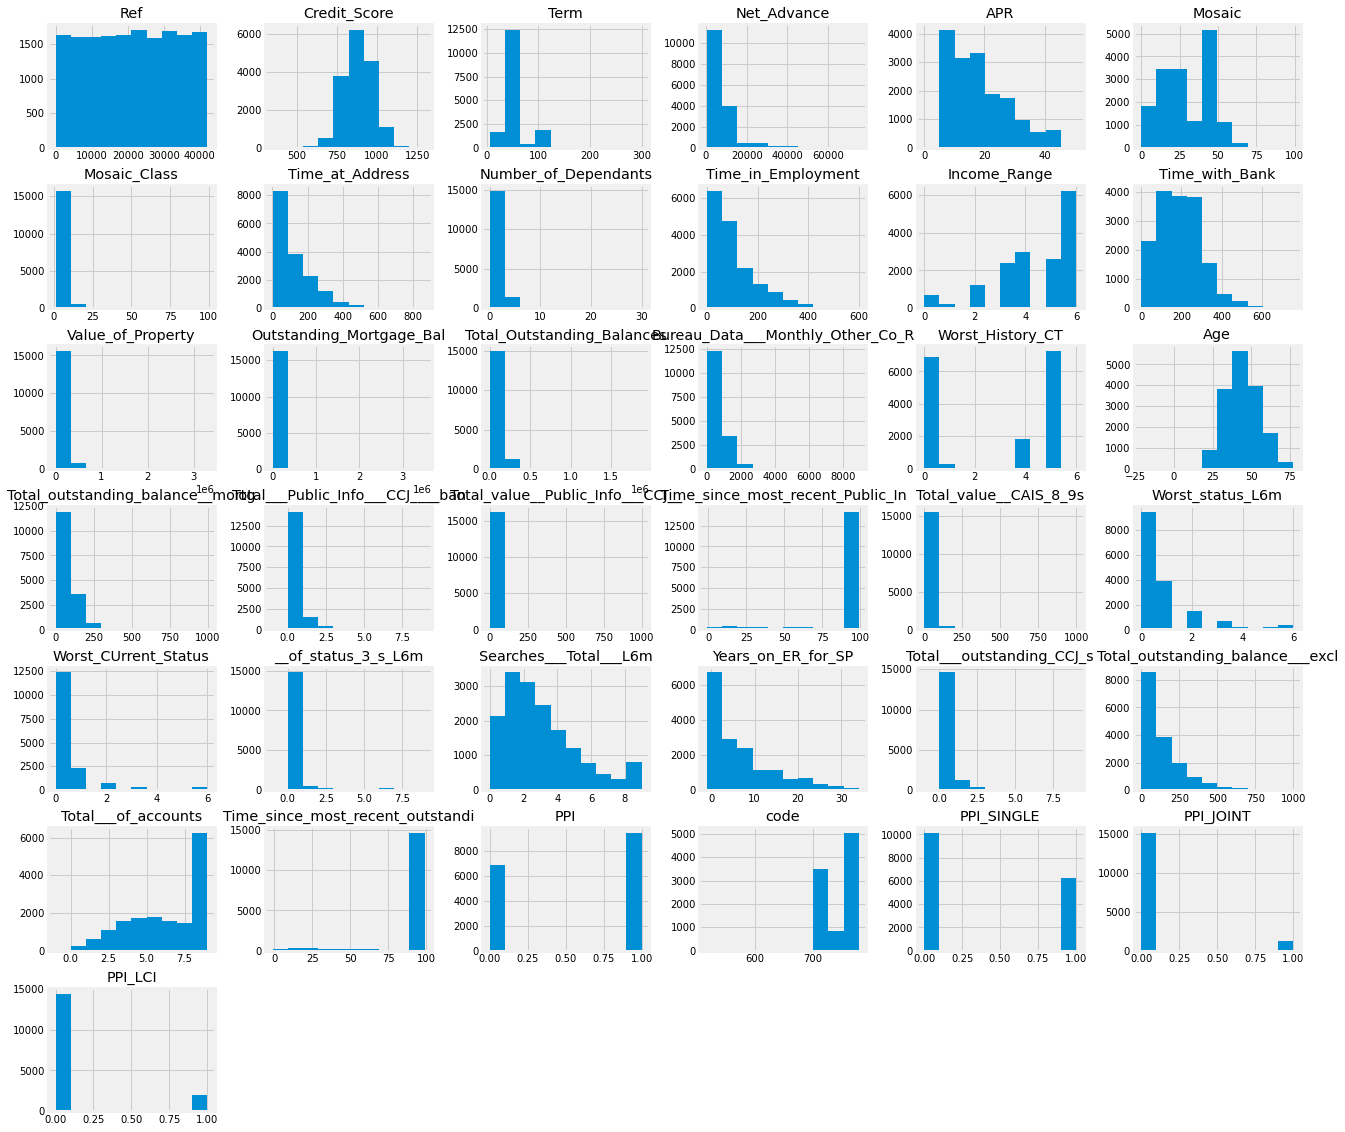

In [1320]:
num_var.hist(figsize=(20,20))
plt.show()

## Data Disturabtiion Observation 

##### 25 variables with Highly Skewed Distribution:
Term, Net_Advance, Mosaic_Class, Time_at_Address, Number_of_Dependants, Time_in_Employment, Value_of_Property, Outstanding_Mortgage_Bal, Total_Outstanding_Balances, Bureau_Data___Monthly_Other_Co_R, Total_outstanding_balance__mortg, Total___Public_Info___CCJ____ban, Total_value__Public_Info___CCJ__, Time_since_most_recent_Public_In, Total_value__CAIS_8_9s, Worst_status_L6m, Worst_CUrrent_Status, __of_status_3_s_L6m, Years_on_ER_for_SP, Total___outstanding_CCJ_s, Total_outstanding_balance___excl, Time_since_most_recent_outstandi, code, PPI_JOINT, PPI_LCI
##### 4 variables with Moderately Skewed Distribution: 
APR, Income_Range, Time_with_Bank, Searches___Total___L6m
##### 8 variables with Fairly Symmetrical Distribution: 
Ref, Credit_Score, Mosaic, Worst_History_CT, Age, Total___of_accounts, PPI, PPI_SINGLE
##### 12 negative minimum valued variables: 
Age, Total_outstanding_balance__mortg, Total___Public_Info___CCJ____ban, Total_value__Public_Info___CCJ__, Time_since_most_recent_Public_In, Total_value__CAIS_8_9s, __of_status_3_s_L6m, Years_on_ER_for_SP, Total___outstanding_CCJ_s, Total_outstanding_balance___excl, Total___of_accounts, Time_since_most_recent_outstandi
##### 29 numerical columns have outliers and 8 do not have any outliers
##### List of columns with outliers:
Credit_Score, Term, Net_Advance, Mosaic, Mosaic_Class, Time_at_Address, Number_of_Dependants, Time_in_Employment, Time_with_Bank, Value_of_Property, Outstanding_Mortgage_Bal, Total_Outstanding_Balances, Bureau_Data___Monthly_Other_Co_R, Age, Total_outstanding_balance__mortg, Total___Public_Info___CCJ____ban, Total_value__Public_Info___CCJ__, Time_since_most_recent_Public_In, Total_value__CAIS_8_9s, Worst_status_L6m, Worst_CUrrent_Status, __of_status_3_s_L6m, Searches___Total___L6m, Years_on_ER_for_SP, Total___outstanding_CCJ_s, Total_outstanding_balance___excl, Time_since_most_recent_outstandi, code, PPI_JOINT, PPI_LCI
##### List of columns with not have  outliers : Ref, APR, Income_Range, Worst_History_CT, Total___of_accounts, PPI, PPI_SINGLE

In [1321]:
# EDA of Categorical Columns 
cat_var = data.describe(include = ['object']).T.sort_values(by = 'unique')
display(cat_var)

count unique                         top   freq
ACCESS_Card               16383      2                       FALSE  13028
Loan_Type                 16383      2                   UnSecured  13054
Telephone_Indicator       16383      2                           Y  15241
Gender                    16383      2                           M   9770
Full_Part_Time_Empl_Ind   16383      2                           F  16308
Perm_Temp_Empl_Ind        16383      2                           P  16361
Current_Account           16383      2                        TRUE  16351
Other_Credit_Store_Card   16383      2                      FALSE   12976
VISA_Card                 16383      2                       TRUE   12087
American_Express          16383      2                       FALSE  16227
Diners_Card               16383      2                       FALSE  16198
Cheque_Guarantee          16383      2                        TRUE  14659
CIFAS_detected            16383      3                           N  16292
Bankruptcy_Detected__SP_  16383      3                           N  16351
Payment_Method            16383      3                           D  16308
category                   9461      4                      Single   6264
Marital_Status            16383      4                           M   9432
Residential_Status        16383      4                           H  12572
Employment_Status         16383      9                           P  10118
Final_Grade               16383     10                           A   4538
prdt_desc                  9345     15                        LASU   3889
Insurance_Description      9461     24  LASU                         2351

In [1322]:
print(data['Insurance_Description'].unique())
data['Insurance_Description'].value_counts()
# print(data['Bankruptcy_Detected__SP_'].unique())
# print(data['Marital_Status'].unique())
# print(data['Employment_Status'].unique())
# print(data['Final_Grade'].unique())
# print(data['prdt_desc'].unique())
# print(data['Insurance_Description'].unique())

[nan 'Life & Critical Illn      ' 'Joint                     '
 'Single                    ' 'LASCI                     '
 'Life & CI                 ' 'LASU                      '
 'Joint Life & Critica      ' '1st Cust-LASU/ 2nd C      '
 'Gold                      ' 'JOINT LIFE & CRITICA      '
 'Bronze                    ' 'LIFE & CRITICAL ILLN      '
 'Select                    ' 'Silver                    '
 '1st Cust-LASCI /2nd       ' 'Other                     '
 'Plus                      ' 'JOINT LASU                '
 'Foundation                ' '1st Cust - LASU / 2n      '
 '1st Cust - LASCI / 2      ' '1st Cust LASCI / 2nd      '
 'JOINT LASCI               ' '1st Cust LASU / 2nd       ']


LASU                          2351
Single                        1849
LIFE & CRITICAL ILLN          1025
Joint                          989
Life & CI                      795
LASCI                          717
Other                          495
JOINT LIFE & CRITICA           283
Life & Critical Illn           248
1st Cust - LASU / 2n           200
JOINT LASU                     159
Joint Life & Critica            68
Gold                            63
1st Cust - LASCI / 2            57
1st Cust-LASU/ 2nd C            42
JOINT LASCI                     39
Plus                            23
1st Cust-LASCI /2nd             12
1st Cust LASCI / 2nd            10
1st Cust LASU / 2nd              8
Bronze                           8
Select                           8
Silver                           7
Foundation                       5
Name: Insurance_Description, dtype: int64

In [1323]:
print(data['prdt_desc'].unique())
data['prdt_desc'].value_counts()  

[nan 'LIFE & CRITICAL ILLNESS' 'LASCI JOINT' 'LASCI' 'LASU' 'LASU JOINT'
 'JOINT LIFE & CRITICAL ILLNESS' '1st Cust - LASU / 2nd Cust - LCI'
 '1st Cust - LASU / 2nd Cust - LASCI' '1st Cust - LASCI / 2nd Cust - LCI'
 '1st Cust - LASCI / 2nd Cust - LASU' '1st Cust - LASU / 2nd Cust - L'
 'JOINT LASU' '1st Cust LASU / 2nd Cust LASCI'
 '1st Cust LASCI / 2nd Cust LASU' 'JOINT LASCI']


LASU                                  3889
LIFE & CRITICAL ILLNESS               1972
LASCI                                 1170
LASU JOINT                             604
JOINT LIFE & CRITICAL ILLNESS          571
1st Cust - LASU / 2nd Cust - LCI       387
JOINT LASU                             285
1st Cust - LASCI / 2nd Cust - LCI      129
LASCI JOINT                            123
JOINT LASCI                             69
1st Cust - LASCI / 2nd Cust - LASU      52
1st Cust - LASU / 2nd Cust - LASCI      44
1st Cust LASCI / 2nd Cust LASU          29
1st Cust LASU / 2nd Cust LASCI          19
1st Cust - LASU / 2nd Cust - L           2
Name: prdt_desc, dtype: int64

In [1324]:
data['PPI'].value_counts()

1    9461
0    6922
Name: PPI, dtype: int64

Text(0.5, 1.0, 'Personal protection insurance  Clients - target value - data unbalance\n (Not Hold  = 0, Hold = 1')

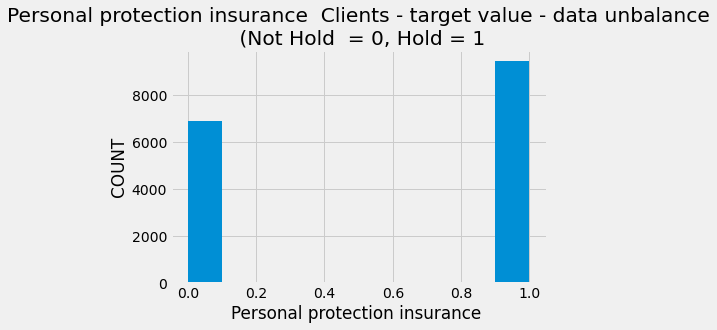

In [1325]:
plt.style.use('fivethirtyeight')
data['PPI'].hist()
plt.xlabel('Personal protection insurance ')
plt.ylabel('COUNT')
plt.title('Personal protection insurance  Clients - target value - data unbalance\n (Not Hold  = 0, Hold = 1')

In [1326]:
dt_count= data.groupby('PPI').size().to_frame('counts').reset_index()
dt_count['PPI'].replace({0: 'Customer Not Holding PPI', 1: 'Customer Holding  PPI'}, inplace = True)
fig = px.pie(dt_count, values = 'counts', names = 'PPI', color = 'PPI', height = 500, width = 700,
title = 'Distribution of PPI (Holding vs Non-holding Customers)',
color_discrete_map = {'Not Hold PPI': '#40CRT', 'Hold PPI': '#50CRT'})
fig.show()

In [1327]:
print(data['category'].unique())
data['category'].value_counts()  

[nan 'LCI' 'Joint' 'Single' 'JOINT']


Single    6264
LCI       1972
JOINT      647
Joint      578
Name: category, dtype: int64

In [1328]:
mis_valcat = ['Insurance_Description', 'category', 'prdt_desc']
data[mis_valcat] = data[mis_valcat].fillna('Missing')
data['code'] = data['code'].fillna(-1)

In [1329]:
data['category'] = data['category'].replace('JOINT', 'Joint')

In [1330]:
cat = data.groupby('category').size().to_frame('counts').reset_index()
fig = px.pie(cat, values = 'counts', names = 'category', color = 'category', 
title = 'Distribution of Category Variable Count', height = 600, width = 500,
color_discrete_map = {'Missing': '#X9SSSA', 'Single': '#X9SSSB', 'LCI': '#X9SSSC', 'Joint': '#X9SSSD'})
fig.show()

In [1331]:
## "Insurance_Description" standardization
data['Insurance_Description'] = data['Insurance_Description'].str.strip().replace({
                                'LIFE & CRITICAL ILLN': 'Life & Critical Illn',
                                'Life & CI': 'Life & Critical Illn',
                                'JOINT LIFE & CRITICA': 'Joint Life & Critica',
                                '1st Cust - LASCI / 2': '1st Cust LASCI / 2nd',
                                '1st Cust-LASCI /2nd': '1st Cust LASCI / 2nd',
                                '1st Cust - LASU / 2n' : '1st Cust LASU / 2nd',
                                '1st Cust-LASU/ 2nd C': '1st Cust LASU / 2nd'}) 

In [1332]:
display(data.groupby(['category', 'Insurance_Description', 'prdt_desc']).size())

category  Insurance_Description  prdt_desc                         
Joint     1st Cust LASCI / 2nd   1st Cust LASCI / 2nd Cust LASU          10
          1st Cust LASU / 2nd    1st Cust LASU / 2nd Cust LASCI           8
          JOINT LASCI            JOINT LASCI                             39
          JOINT LASU             JOINT LASU                             159
          Joint                  1st Cust - LASCI / 2nd Cust - LASU      52
                                 1st Cust - LASU / 2nd Cust - LASCI      44
                                 1st Cust LASCI / 2nd Cust LASU          17
                                 1st Cust LASU / 2nd Cust LASCI          10
                                 JOINT LASCI                             26
                                 JOINT LASU                             113
                                 LASCI JOINT                            123
                                 LASU JOINT                             604
          Other     

In [1333]:
## Looking at "category" and "Insurance_Description"
_ = (data.groupby(['category', 'Insurance_Description']).size()
     .sort_values(ascending = False).to_frame('count').reset_index())
fig = px.bar(_, x = 'category', y = 'count', color = 'Insurance_Description', 
             height = 600, width = 500, title = 'Category & Insurance Description Analysis')
fig.update_layout(template = 'simple_white')
fig.show()

In [1334]:
## Analyzing Bankruptcy_Detected__SP_ variable
display(data['Bankruptcy_Detected__SP_'].value_counts().sort_values(ascending = False), 
        data['CIFAS_detected'].value_counts().sort_values(ascending = False))

N    16351
Y       24
T        8
Name: Bankruptcy_Detected__SP_, dtype: int64

N    16292
Y       83
T        8
Name: CIFAS_detected, dtype: int64

In [1335]:
## Analyzing "Bankruptcy_Detected__SP_" & "CIFAS_detected"
data.groupby(['Bankruptcy_Detected__SP_', 'CIFAS_detected']).size()

## keeping only the ones without bankruptcy or CIFAS in the target population
data['Check'] = 'Drop'
data.loc[(data['Bankruptcy_Detected__SP_'] == 'N') & 
         (data['CIFAS_detected'] == 'N') & 
         (data['PPI'] == 0), 'Check'] = 'Keep'

data.loc[(data['PPI']==1), 'Check'] = 'Keep'

In [1336]:
print('Number of customers with either a bankruptcy or a CIFAS detected (Y & T):', 
      data.loc[data['Check']=='Drop'].shape[0])
data = data.loc[(data['Check']=='Keep')]
print('Shape of dataframe after dropping customers with either a bankruptcy or a CIFAS detected (Y & T):', data.shape)
del data['Check']

Number of customers with either a bankruptcy or a CIFAS detected (Y & T): 37
Shape of dataframe after dropping customers with either a bankruptcy or a CIFAS detected (Y & T): (16346, 60)


In [1337]:
cat_cols = data.select_dtypes(include = 'object').columns

for col in cat_cols:
    print('{} column unique values: {}'.format(col, list(data[col].unique())))

## Removing spaces and spell correction in categorical columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.str.strip().replace('FALS', 'FALSE'))

Final_Grade column unique values: ['A', 'X', 'B', 'D', 'E', 'C', 'R', 'F', 'O', 'S']
Loan_Type column unique values: ['UnSecured', 'secured  ']
Residential_Status column unique values: ['H', 'R', 'T', 'L']
Telephone_Indicator column unique values: ['Y', 'N']
Marital_Status column unique values: ['M', 'S', 'D', 'W']
Gender column unique values: ['M', 'F']
Employment_Status column unique values: ['S', 'R', 'P', 'G', 'D', 'M', 'H', 'U', 'T']
Full_Part_Time_Empl_Ind column unique values: ['F', 'P']
Perm_Temp_Empl_Ind column unique values: ['P', 'T']
Current_Account column unique values: ['TRUE', 'FALS']
ACCESS_Card column unique values: ['FALSE', 'TRUE ']
VISA_Card column unique values: ['FALSE', 'TRUE ']
American_Express column unique values: ['FALSE', 'TRUE ']
Diners_Card column unique values: ['FALSE', 'TRUE ']
Cheque_Guarantee column unique values: ['TRUE', 'FALS']
Other_Credit_Store_Card column unique values: ['TRUE  ', 'FALSE ']
Payment_Method column unique values: ['D', 'S', 'C']
Ba

In [1338]:
## Handle high cardinality - leaving apart the 'Insurance_Description' and 'prdt_desc'
print('Considering all below 5% in proportion as "Others" provided that the column has more than 3 values')
cardCols = list(data.select_dtypes(include='object').columns)
# cardCols.remove('Insurance_Description')
cardCols.remove('prdt_desc')

for col in cardCols:
    counts = data[col].value_counts(normalize=True)
    if (len(counts)) > 3:
        l = list(counts.loc[counts<0.05].index)
        data.loc[data[col].isin(l), col] = 'Others'
        print(f'{col} - List of values replaced as "Others":', l)
        _ = data.groupby(col).size().sort_values(ascending = False).to_frame('count').reset_index()
        fig = px.bar(_, x = col, y = 'count', color = col, height = 600, width = 500, 
                     title = 'Plot of Values in {}'.format(col))
        fig.show()

Considering all below 5% in proportion as "Others" provided that the column has more than 3 values
Final_Grade - List of values replaced as "Others": ['F', 'O', 'R', 'S']


Residential_Status - List of values replaced as "Others": ['L', 'R']


Marital_Status - List of values replaced as "Others": ['W']


Employment_Status - List of values replaced as "Others": ['R', 'D', 'M', 'U', 'H', 'T']


Insurance_Description - List of values replaced as "Others": ['LASCI', 'Other', 'Joint Life & Critica', '1st Cust LASU / 2nd', 'JOINT LASU', '1st Cust LASCI / 2nd', 'Gold', 'JOINT LASCI', 'Plus', 'Bronze', 'Select', 'Silver', 'Foundation']


category - List of values replaced as "Others": []


<AxesSubplot:xlabel='category', ylabel='count'>

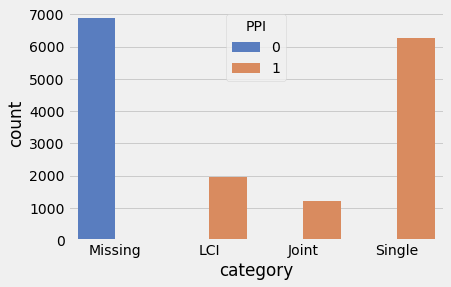

In [1339]:
# PPI holders with category
sns.countplot(x='category', data = data,hue="PPI", palette="muted")

In [1340]:
data_desc = data.groupby(['PPI', 'prdt_desc']).size().to_frame('count').reset_index()
fig = px.bar(data_desc, x = 'PPI', y = 'count', color = 'prdt_desc', height = 600, width = 500)
fig.show()

In [1341]:
f= data.groupby(['PPI', 'Final_Grade']).size().to_frame('count').reset_index()
fig = px.bar(f, x = 'PPI', y = 'count', color = 'Final_Grade', height = 600, width = 500,
            color_discrete_sequence=px.colors.qualitative.Bold)
fig.show()

<AxesSubplot:xlabel='Current_Account', ylabel='count'>

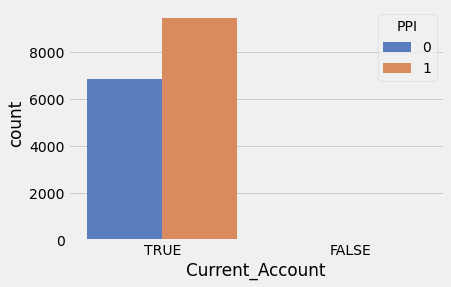

In [1342]:
sns.countplot(x='Current_Account', data = data,hue="PPI", palette="muted")

In [1343]:
print('Loan_Type - Customers preference is towards unsecured loans')
l = data.groupby(['PPI', 'Loan_Type']).size().to_frame('count').reset_index()
fig = px.bar(l, x = 'PPI', y = 'count', color = 'Loan_Type', height = 600, width = 500,
            color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

Loan_Type - Customers preference is towards unsecured loans


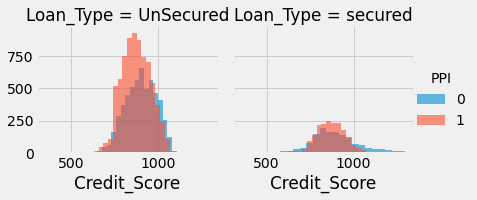

In [1344]:
g = sns.FacetGrid(data, col='Loan_Type', hue='PPI')
g.map(plt.hist, 'Credit_Score', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

In [1345]:
rs= data.groupby(['PPI', 'Residential_Status']).size().to_frame('count').reset_index()
fig = px.bar(rs, x = 'PPI', y = 'count', color = 'Residential_Status', height = 600, width = 500,
            color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

In [1346]:
ti= (data.groupby(['PPI', 'Telephone_Indicator']).size()
     .to_frame('count').reset_index()
     .sort_values(by = 'count', ascending = False))
fig = px.bar(ti, x = 'PPI', y = 'count', color = 'Telephone_Indicator', height = 600, width = 500,
            color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

In [1347]:


g=  data.groupby('Gender').size().to_frame('count').reset_index()
fig1 = px.pie(g, names = 'Gender', color = 'Gender', values = 'count', height = 600, width = 500, 
              color_discrete_sequence = px.colors.qualitative.D3)

g1= data.groupby(['PPI', 'Gender']).size().to_frame('count').reset_index()
fig2 = px.bar(g1, x = 'PPI', y = 'count', color = 'Gender', height = 600, width = 500,
            color_discrete_sequence=px.colors.qualitative.D3)
fig1.show()
fig2.show()

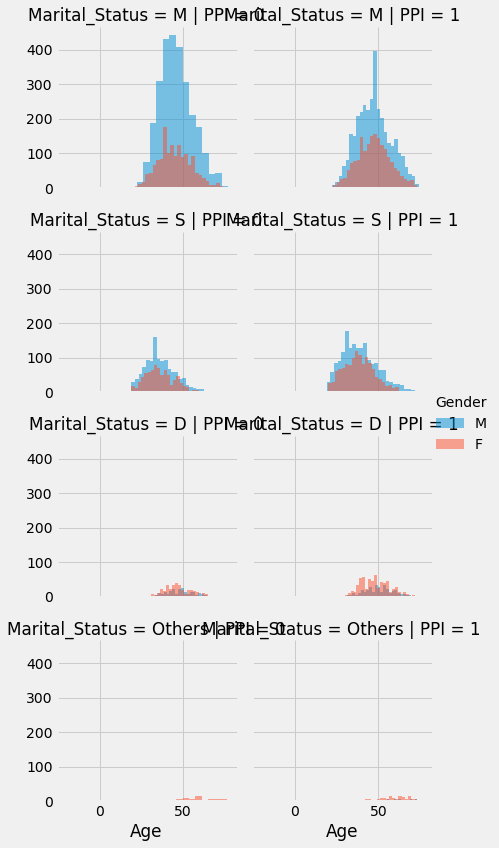

In [1348]:
g = sns.FacetGrid(data, col='PPI', row= "Marital_Status", hue='Gender')
g.map(plt.hist, 'Age', alpha=0.5, bins=25) 
g.add_legend()

In [1349]:
print('Employment Status - In a total customer with a PPI, the proportion of P increases by ~5%.')
pprint.pprint('The proportion of G makes up about 3% of the decrease in a total customer with a PPI versus not having a PPI.')

e=  data.groupby('Employment_Status').size().to_frame('count').reset_index()
fig1 = px.pie(e, names = 'Employment_Status', color = 'Employment_Status', values = 'count', height = 600, width = 500, 
              color_discrete_map = {'P': '#716F50', 'G': '#B97A60', 'S': '#F6AE70', 'Others': '#F2E180'})

e1 = data.groupby(['PPI', 'Employment_Status']).size().to_frame('count').reset_index()
fig2 = px.bar(e1, x = 'PPI', y = 'count', color = 'Employment_Status', height = 500, width = 500,
            color_discrete_map = {'P': '#716F81', 'G': '#B97A95', 'S': '#F6AE99', 'Others': '#F2E1C1'})

fig1.show()
fig2.show()

Employment Status - In a total customer with a PPI, the proportion of P increases by ~5%.
('The proportion of G makes up about 3% of the decrease in a total customer '
 'with a PPI versus not having a PPI.')


In [1350]:
c= data.groupby(['PPI', 'Cheque_Guarantee']).size().to_frame('count').reset_index()
fig = px.bar(c, x = 'PPI', y = 'count', color = 'Cheque_Guarantee', height = 600, width = 500,
            color_discrete_map = {'FALSE': '#8ecae6', 'TRUE': '#9ecae8'})

fig.show()

<AxesSubplot:xlabel='Other_Credit_Store_Card', ylabel='count'>

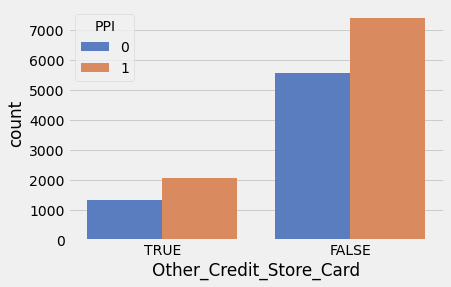

In [1351]:
sns.countplot(x='Other_Credit_Store_Card', data = data,hue="PPI", palette="muted")

<AxesSubplot:xlabel='Payment_Method', ylabel='count'>

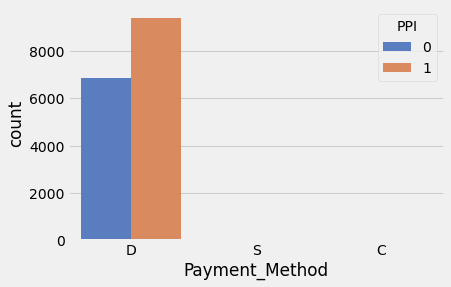

In [1352]:
sns.countplot(x='Payment_Method', data = data,hue="PPI", palette="muted")

In [1353]:
## Dropping 'Bankruptcy_Detected__SP and Dropping 'CIFAS_detected' from the further analysis
del data['Bankruptcy_Detected__SP_']
del data['CIFAS_detected']

In [1354]:
print('Insurance_Description - Missing for all customers part of target population.')
pprint.pprint('For all customers who are having a PPI, insurance description is always available.')
_ = data.groupby(['PPI', 'Insurance_Description']).size().to_frame('count').reset_index()
fig = px.bar(_, x = 'PPI', y = 'count', color = 'Insurance_Description', height = 600, width = 500)
# fig.update_layout(template = 'simple_white')
fig.show()

Insurance_Description - Missing for all customers part of target population.
('For all customers who are having a PPI, insurance description is always '
 'available.')


In [1355]:
print('prdt_desc - Missing for all customers part of target population.')
pprint.pprint('Customers who are having a PPI, prdt_desc is available for ~98% of them.')
_ = data.groupby(['PPI', 'prdt_desc']).size().to_frame('count').reset_index()
fig = px.bar(_, x = 'PPI', y = 'count', color = 'prdt_desc', height = 600, width = 500)
fig.update_layout(template = 'simple_white')
fig.show()

prdt_desc - Missing for all customers part of target population.
'Customers who are having a PPI, prdt_desc is available for ~98% of them.'


In [1356]:
print('category - Missing for all customers part of target population.')
pprint.pprint('For all customers who are having a PPI, category is always available.')
_ = data.groupby(['PPI', 'category']).size().to_frame('count').reset_index()
fig = px.bar(_, x = 'PPI', y = 'count', color = 'category', height = 600, width = 500)
fig.update_layout(template = 'simple_white')
fig.show()

category - Missing for all customers part of target population.
'For all customers who are having a PPI, category is always available.'


In [1357]:
print('Category and Insurance Description for customers who have a PPI product and where Product Description is missing')
display(data.loc[(data['PPI'] == 1) & (data['prdt_desc'] == 'Missing')]
[['category', 'Insurance_Description', 'prdt_desc']].value_counts())

Category and Insurance Description for customers who have a PPI product and where Product Description is missing


category  Insurance_Description  prdt_desc
Single    Others                 Missing      116
dtype: int64

In [1358]:
## Replace 'FALSE' with 0 and 'TRUE' with 1
cat_cols = list(data.select_dtypes(include='object').columns)
data[cat_cols] = data[cat_cols].apply(lambda x: x.replace({'FALSE':0, 'TRUE':1}))

In [1359]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif,SelectKBest,SelectPercentile

In [1360]:
# data['PPI'] = data['PPI'].map({'No': 0 , 'Yes': 1})
# data.PPI = pd.to_numeric(data.PPI, errors='coerce')

In [1361]:
le = sklearn.preprocessing.LabelEncoder()
encVal = {}
cat_cols = list(data.select_dtypes(include='object').columns)
for col in cat_cols:
    print('{} column unique values: {}'.format(col, list(data[col].unique())))
    data[col + '_le'] = le.fit_transform(data[col])
    encVal[col] = list(data[[col, col + '_le']].drop_duplicates().set_index(col+'_le').to_dict().values())[0]
    del data[col]

Final_Grade column unique values: ['A', 'X', 'B', 'D', 'E', 'C', 'Others']
Loan_Type column unique values: ['UnSecured', 'secured']
Residential_Status column unique values: ['H', 'Others', 'T']
Telephone_Indicator column unique values: ['Y', 'N']
Marital_Status column unique values: ['M', 'S', 'D', 'Others']
Gender column unique values: ['M', 'F']
Employment_Status column unique values: ['S', 'Others', 'P', 'G']
Full_Part_Time_Empl_Ind column unique values: ['F', 'P']
Perm_Temp_Empl_Ind column unique values: ['P', 'T']
Payment_Method column unique values: ['D', 'S', 'C']
Insurance_Description column unique values: ['Missing', 'Life & Critical Illn', 'Joint', 'Single', 'Others', 'LASU']
prdt_desc column unique values: ['Missing', 'LIFE & CRITICAL ILLNESS', 'LASCI JOINT', 'LASCI', 'LASU', 'LASU JOINT', 'JOINT LIFE & CRITICAL ILLNESS', '1st Cust - LASU / 2nd Cust - LCI', '1st Cust - LASU / 2nd Cust - LASCI', '1st Cust - LASCI / 2nd Cust - LCI', '1st Cust - LASCI / 2nd Cust - LASU', '1st C

In [1362]:
## List of columns
num_var = data.select_dtypes(include='number')
# Cols = list(data.select_dtypes(include = np.number).columns)
# num_var.drop('PPI')
# num_var.drop('Ref')

Cols_cor = num_var.copy()
Cols_cor['Target'] = Cols_cor['PPI']
# Cols_trans['Target'] = Cols_trans['PPI'].apply(
#      lambda x: 0 if x == 'No' else 1)
Cols_cor= Cols_cor.drop(['PPI', 'Ref'], axis=1)
correlations = Cols_cor.corr()['Target'].sort_values().reset_index()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))


Most Positive Correlations: 
          index    Target
51   PPI_JOINT  0.242807
52     PPI_LCI  0.315972
53  PPI_SINGLE  0.672413
54        code  0.991764
55      Target  1.000000

Most Negative Correlations: 
                               index    Target
0                      prdt_desc_le -0.649470
1          Insurance_Description_le -0.150071
2                 Value_of_Property -0.146981
3                      Credit_Score -0.138522
4  Total_outstanding_balance__mortg -0.128372


<AxesSubplot:title={'center':'Correlation with PPI'}>

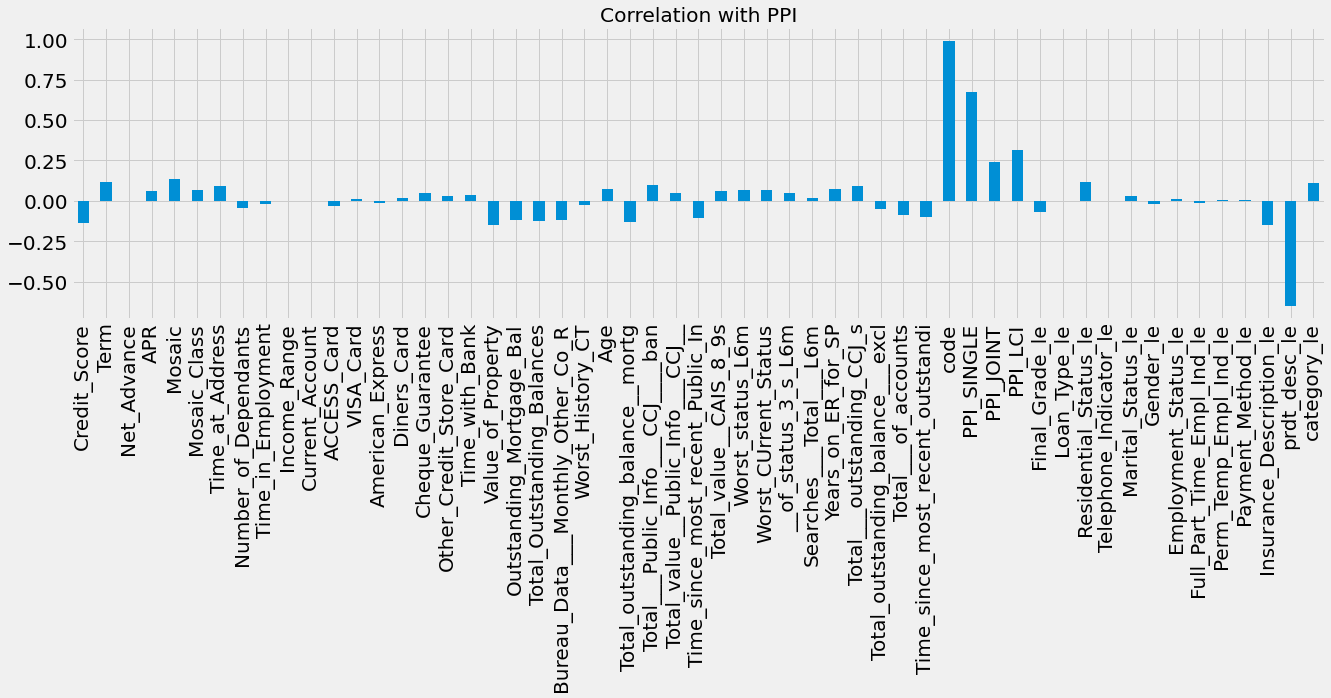

In [1363]:
# Corrleation with all Variabls 
X = Cols_cor.drop(['Target'],axis=1)
X.corrwith(Cols_cor['Target']).plot.bar(figsize = (20, 5), title = "Correlation with PPI", 
                                        fontsize = 20,rot = 90, grid = True)

# Feature Reduction 

Feature reduction based on the pearson pairwise correlation matrix and then correlation of the variable with the PPI. Where there were multi-colinear features, their correlation with PPI variable was checked and the one with lower correlation was dropped from the analysis.


In [1364]:
# Correlation matrix for all variables
def correlation_matrix(df, threshold = 0.8):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize = (15, 7.2))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {'shrink': .5})#, annot = True)
    ax.set_title('Correlation Matrix of Data')

    # Filter for correlation value greater than threshold
    sort = corr.abs().unstack()
    sort = sort.sort_values(kind = 'quicksort', ascending = False)
    display(sort[(sort > threshold) & (sort < 1)])

In [1365]:
# List of columns
Cols = list(data.select_dtypes(include = np.number).columns)
Cols.remove('PPI')
Cols.remove('Ref')
print('List of columns except Ref & PPI::', Cols)

List of columns except Ref & PPI:: ['Credit_Score', 'Term', 'Net_Advance', 'APR', 'Mosaic', 'Mosaic_Class', 'Time_at_Address', 'Number_of_Dependants', 'Time_in_Employment', 'Income_Range', 'Current_Account', 'ACCESS_Card', 'VISA_Card', 'American_Express', 'Diners_Card', 'Cheque_Guarantee', 'Other_Credit_Store_Card', 'Time_with_Bank', 'Value_of_Property', 'Outstanding_Mortgage_Bal', 'Total_Outstanding_Balances', 'Bureau_Data___Monthly_Other_Co_R', 'Worst_History_CT', 'Age', 'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban', 'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In', 'Total_value__CAIS_8_9s', 'Worst_status_L6m', 'Worst_CUrrent_Status', '__of_status_3_s_L6m', 'Searches___Total___L6m', 'Years_on_ER_for_SP', 'Total___outstanding_CCJ_s', 'Total_outstanding_balance___excl', 'Total___of_accounts', 'Time_since_most_recent_outstandi', 'code', 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI', 'Final_Grade_le', 'Loan_Type_le', 'Residential_Status_le', 'Telepho

In [1366]:
## Dropping variables - since these variables are correlated with other variables
## While deciding which variable to drop variable's correlation with 'PPI' was checked
## the one with the lower correlation is dropped
dropCols = ('Total_Outstanding_Balances', 'Time_since_most_recent_outstandi', 
            'Total___outstanding_CCJ_s', 'Bureau_Data___Monthly_Other_Co_R', 
            'Total___Public_Info___CCJ____ban', 'Net_Advance', 'Years_on_ER_for_SP',
            'Outstanding_Mortgage_Bal', '__of_status_3_s_L6m', 'Worst_CUrrent_Status',
            'Mosaic_Class', 'APR', 'category_le')
Cols = [e for e in Cols if e not in dropCols]
# data.drop(Cols, axis = 1, inplace = True)

Series([], dtype: float64)

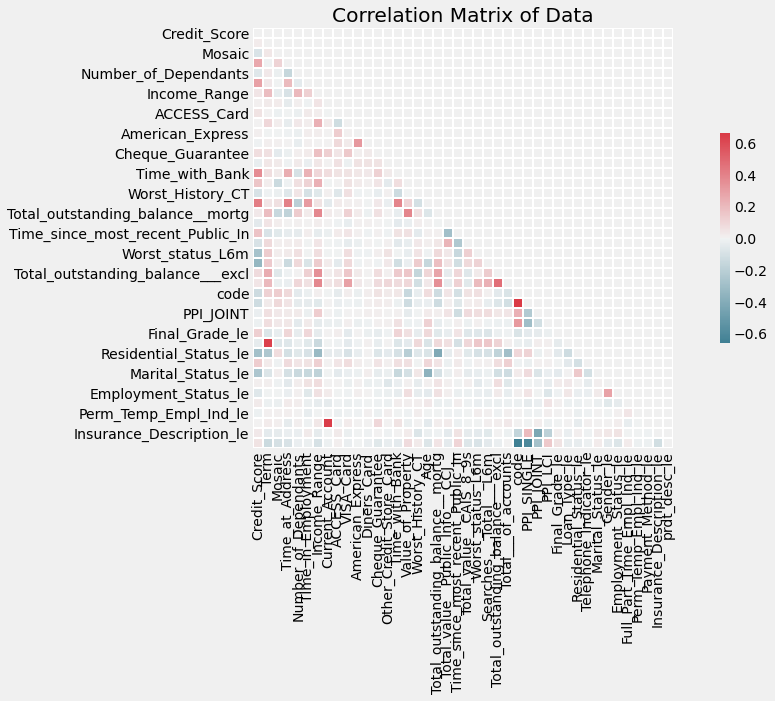

In [1367]:
# Correlation matrix for numerical variables
correlation_matrix(data[Cols], threshold = 0.7) #threshold = 0.5

In [1368]:
# Absolute correlation of independent (numerical) variables with the target variable
absCorrwithDep = []

for var in Cols:
    absCorrwithDep.append(abs(data['PPI'].corr(data[var])))

display(pd.DataFrame([Cols, absCorrwithDep], index = ['Variable', 'Correlation'])
        .T.sort_values('Correlation', ascending = False).reset_index(drop=True).head())

Variable Correlation
0          code    0.991764
1    PPI_SINGLE    0.672413
2  prdt_desc_le     0.64947
3       PPI_LCI    0.315972
4     PPI_JOINT    0.242807

## Feature Selection 
#### Weight of Evidence and Information Value 

The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. “Bad Customers” refers to the customers who defaulted on a loan. and “Good Customers” refers to the customers who paid back loan.

According to the same source, Information Value is:

Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance.

##### Information Value	Predictive Power
[<'0.02	Useless for Prediction'
0.02-0.1	Weak Predictor
0.1-0.3	Medium Predictor
0.3-0.5	Strong Predictor >0.5	Suspicious or too good to be true]


In [1369]:
## For any negative values in the dataset, replace with median
## Assuming negative values were not meant to be...
l = []
for c in list(data.columns):
    try: 
        if c != 'code' and min(data[c]) < 0: 
            l.append(c); 
            data.loc[data[c] < 0, c] = data[c].median()
    except:pass
print('List of columns containing negative values, except code variable, include:', l)

List of columns containing negative values, except code variable, include: ['Age', 'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban', 'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In', 'Total_value__CAIS_8_9s', '__of_status_3_s_L6m', 'Years_on_ER_for_SP', 'Total___outstanding_CCJ_s', 'Total_outstanding_balance___excl', 'Total___of_accounts', 'Time_since_most_recent_outstandi']


In [1370]:
def prep_dataset(data, target):
    from xverse.feature_subset import SplitXY
    clf = SplitXY([target]) #Split the dataset into X and y
    X, y = clf.fit_transform(data) #returns features (X) dataset and target(Y) as a numpy array
    return X, y

In [1371]:
from xverse.transformer import WOE
## Adding interpretation to IV
def interpretation(iv):
    if iv < 0.02:
        return 'useless'
    elif iv >= 0.02 and iv < 0.1:
        return 'weak'
    elif iv >= 0.1 and iv < 0.3:
        return 'medium'
    elif iv >= 0.3 and iv < 0.5:
        return 'strong'
    else:
        return 'suspicious'

## prepare dataset - as required by the package
X, y = prep_dataset(data, target = 'PPI')

## Calculate WOE and IV for columns of the data dataframe
clf = WOE(mono_max_bins = 30)

## fit WOE
clf.fit(X, y)

## get clf transformed woe dataframe
# woedf = clf.transform(X)

## IV dataframe
IV = clf.iv_df
IV['Interpretation'] = IV['Information_Value'].map(interpretation)
display(IV)

Variable_Name  Information_Value Interpretation
55                      prdt_desc_le           0.899262     suspicious
25                        PPI_SINGLE           0.718341     suspicious
54                              code           0.439489         strong
14          Insurance_Description_le           0.239598         medium
47                 Value_of_Property           0.112956         medium
17                            Mosaic           0.093838           weak
44            Total_value__CAIS_8_9s           0.077963           weak
32                              Term           0.075806           weak
18                      Mosaic_Class           0.070043           weak
6                       Credit_Score           0.067078           weak
38        Total_Outstanding_Balances           0.057119           weak
29             Residential_Status_le           0.055238           weak
22          Outstanding_Mortgage_Bal           0.054827           weak
43  Total_outstanding_balance__mortg           0.053702           weak
45  Total_value__Public_Info___CCJ__           0.049170           weak
24                           PPI_LCI           0.048720           weak
4   Bureau_Data___Monthly_Other_Co_R           0.048700           weak
40               Total___of_accounts           0.043687           weak
10                    Final_Grade_le           0.040833           weak
33                   Time_at_Address           0.029012           weak
39  Total___Public_Info___CCJ____ban           0.022469           weak
13                      Income_Range           0.022318           weak
2                                Age           0.021806           weak
16                 Marital_Status_le           0.020299           weak
9               Employment_Status_le           0.018839        useless
23                         PPI_JOINT           0.017954        useless
48              Worst_CUrrent_Status           0.017197        useless
41         Total___outstanding_CCJ_s           0.016835        useless
51                Years_on_ER_for_SP           0.016529        useless
50                  Worst_status_L6m           0.016441        useless
1                                APR           0.013501        useless
52               __of_status_3_s_L6m           0.012636        useless
20              Number_of_Dependants           0.011651        useless
37                    Time_with_Bank           0.010608        useless
19                       Net_Advance           0.008352        useless
5                   Cheque_Guarantee           0.008291        useless
42  Total_outstanding_balance___excl           0.006037        useless
0                        ACCESS_Card           0.005012        useless
26                 Payment_Method_le           0.003906        useless
21           Other_Credit_Store_Card           0.003752        useless
34                Time_in_Employment           0.003408        useless
28                               Ref           0.002769        useless
30            Searches___Total___L6m           0.002181        useless
12                         Gender_le           0.001734        useless
8                        Diners_Card           0.001605        useless
35  Time_since_most_recent_Public_In           0.001429        useless
36  Time_since_most_recent_outstandi           0.001429        useless
3                   American_Express           0.000990        useless
11        Full_Part_Time_Empl_Ind_le           0.000557        useless
46                         VISA_Card           0.000392        useless
49                  Worst_History_CT           0.000212        useless
27             Perm_Temp_Empl_Ind_le           0.000077        useless
15                      Loan_Type_le           0.000046        useless
31            Telephone_Indicator_le           0.000030        useless
7                    Current_Account           0.000009        useless
53                       category_le           

In [1372]:
print('Based on the IV - Which are the strong, medium, weak attributes?')
ivSelCols = (list(IV.loc[IV['Interpretation'].isin(['strong', 'medium', 'weak']), 'Variable_Name']))
print(ivSelCols)

Based on the IV - Which are the strong, medium, weak attributes?
['code', 'Insurance_Description_le', 'Value_of_Property', 'Mosaic', 'Total_value__CAIS_8_9s', 'Term', 'Mosaic_Class', 'Credit_Score', 'Total_Outstanding_Balances', 'Residential_Status_le', 'Outstanding_Mortgage_Bal', 'Total_outstanding_balance__mortg', 'Total_value__Public_Info___CCJ__', 'PPI_LCI', 'Bureau_Data___Monthly_Other_Co_R', 'Total___of_accounts', 'Final_Grade_le', 'Time_at_Address', 'Total___Public_Info___CCJ____ban', 'Income_Range', 'Age', 'Marital_Status_le']


In [1373]:
print('Considering only the suspicious, strong, medium, and weak variables based on the IV')
ivSelCols.extend(['PPI', 'Ref', 'Insurance_Description_le'])

data = data.loc[:, list(set(ivSelCols))]

print('Shape of the data after selecting featurers based on the Information Value:', data.shape)

Considering only the suspicious, strong, medium, and weak variables based on the IV
Shape of the data after selecting featurers based on the Information Value: (16346, 24)


In [1374]:
## Correlation of independent variables with PPI
corr = data.corrwith(data['PPI']).sort_values().drop('PPI')
fig = px.bar(corr, color_discrete_map = {'Variable': 'red'},
             labels={'value': 'Correlation',
                     'index': 'Variable'},
             title = 'Correlation of Independent with Dependent Variables')
fig.update_traces(hovertemplate = 'Variable: %{x} <br>Correlation: %{y}')
fig.update_layout(showlegend = False, template = 'simple_white')
fig.show()

## EDA of Numerical Columns 

In [1375]:
catCols = data.columns[data.columns.str.contains('_le', case=True)]
numCols = list(set(data.columns) - set(catCols))
numCols.remove('PPI')
numCols.remove('Ref')

In [1376]:
## Get back the categorical value columns
for k, v in encVal.items():
    try: data[k] = data[k + '_le'].replace(v)
    except: pass


In [1377]:
_ =  data.groupby('Income_Range').size().to_frame('count').reset_index()
_['Percentage'] = np.round(_['count']/_['count'].sum(), 3)
_.sort_values(by = 'Percentage', ascending = False, inplace = True)
fig = px.bar(_, x = 'Income_Range', color = 'Income_Range', text = _['Percentage'],
             y = 'count', height = 500, width = 800)
fig.update_layout(template = 'simple_white', 
                  title = 'Income range = 6 accounted for 38% of all the income range available')
fig.show()



In [1378]:
print('Income_Range - Customers at lower and higher income range don\'t prefer PPI products.')
_ = data.groupby(['PPI','Income_Range']).size().reset_index()
_['Percentage'] = (data.groupby(['PPI', 'Income_Range']).size()
                          .groupby(level = 0).apply(lambda x:100 * x / float(x.sum())).values)
_.columns = ['PPI', 'Income_Range', 'Counts', 'Percentage']
_['Percentage'] = _['Percentage'].map('{:,.2f}%'.format)

fig = px.bar(_, x = 'PPI', y = 'Counts', color = 'Income_Range', 
             barmode = 'stack', text = _['Percentage'], color_continuous_scale = 'teal')
fig.update_layout(title = 'Ideal income range for PPI is [1-5]', template = 'simple_white',
                  xaxis_title = 'PPI', yaxis_title = 'Counts', width = 600, height = 600)
fig.show()

Income_Range - Customers at lower and higher income range don't prefer PPI products.


In [1379]:
 _ =  data.groupby('Total___of_accounts').size().to_frame('count').reset_index()
_['Percentage'] = np.round(_['count']/_['count'].sum()*100, 2)
_.sort_values(by = 'Percentage', ascending = False, inplace = True)
fig = px.bar(_, x = 'Total___of_accounts', color = 'Total___of_accounts', text = _['Percentage'],
             y = 'count', height = 500, width = 800)
fig.update_layout(template = 'simple_white', 
                  title = 'Customers with 9 number of accounts accounted for a whopping 30% of all customers')
fig.show()

In [1380]:
print('Total___of_accounts - Contains negative number !!! Replacing negative with the median')
data.loc[data['Total___of_accounts'] < 0, 'Total___of_accounts'] = data['Total___of_accounts'].median()

print('Analysis of total number of accounts by PPI')
_ = data.groupby(['PPI','Total___of_accounts']).size().reset_index()
_['Percentage'] = (data.groupby(['PPI', 'Total___of_accounts']).size()
                          .groupby(level = 0).apply(lambda x:100 * x / float(x.sum())).values)
_.columns = ['PPI', 'Total___of_accounts', 'Counts', 'Percentage']
_['Percentage'] = _['Percentage'].map('{:,.2f}%'.format)

fig = px.bar(_, x = 'PPI', y = 'Counts', color = 'Total___of_accounts', 
             barmode = 'stack', text = _['Percentage'], color_continuous_scale = 'purp')
fig.update_layout(title = 'Ideal number of accounts range for PPI is [1-6]', template = 'simple_white',
                  xaxis_title = 'PPI', yaxis_title = 'Counts', width = 600, height = 600)
fig.show()

Total___of_accounts - Contains negative number !!! Replacing negative with the median
Analysis of total number of accounts by PPI


In [1381]:
data.columns 

Index(['Insurance_Description_le', 'Total_value__Public_Info___CCJ__',
       'Mosaic', 'Income_Range', 'Total_outstanding_balance__mortg',
       'Final_Grade_le', 'PPI_LCI', 'code', 'Marital_Status_le',
       'Total_Outstanding_Balances', 'Ref', 'Total___of_accounts', 'PPI',
       'Total___Public_Info___CCJ____ban', 'Credit_Score',
       'Bureau_Data___Monthly_Other_Co_R', 'Term', 'Age',
       'Total_value__CAIS_8_9s', 'Value_of_Property', 'Residential_Status_le',
       'Mosaic_Class', 'Time_at_Address', 'Outstanding_Mortgage_Bal',
       'Final_Grade', 'Residential_Status', 'Marital_Status',
       'Insurance_Description'],
      dtype='object')

In [1382]:
print('Analysis of Total of Accounts, Insurance Description and PPI based on Average Number of Accounts')
fig = px.histogram(data, y = 'Insurance_Description', x = 'Total___of_accounts', color = 'PPI', histfunc = 'avg',
                  color_discrete_sequence = px.colors.qualitative.Dark24)
fig.update_layout(title = 'Average of total accounts for customers holding PPI was highest in Joint insurance product', 
                  template = 'simple_white', xaxis_title = 'category', yaxis_title = 'Count of Total___of_accounts', 
                  width =600, height = 500)
fig.show()

Analysis of Total of Accounts, Insurance Description and PPI based on Average Number of Accounts


In [1383]:
print('Analysis of Total of Accounts, Category and PPI based on counts')
fig = px.histogram(data, x = 'Insurance_Description', y = 'Total___of_accounts', 
                   color = 'Total___of_accounts', histfunc = 'count', facet_col = 'PPI')
fig.update_layout(title = 'Customers with total of accounts = 9 are to be preferred for offering PPI', 
                  template = 'simple_white', xaxis_title = 'Insurance_Description', yaxis_title = 'Count of Total___of_accounts', 
                  width = 800, height = 600)
fig.show()

Analysis of Total of Accounts, Category and PPI based on counts


In [1384]:
print('Age - Contains negative number !!! Replacing negative with the median')
data.loc[data['Age'] < 0, 'Age'] = data['Age'].median()

## Binning age variable
data['Age_bin'] = pd.qcut(data['Age'], q = 6, precision = 0).apply(lambda x: str(x.left) + '-' + str(x.right))

Age - Contains negative number !!! Replacing negative with the median


In [1385]:
## Analysis of Age_bin & PPI
_ = data.groupby(['PPI', 'Age_bin']).size().to_frame('count').reset_index()
_['Percentage'] = (data.groupby(['PPI', 'Age_bin']).size()
                   .groupby(level = 0).apply(lambda x: np.round(100 * x / float(x.sum()), 2)).values)

fig = px.bar(_, x = 'PPI', y = 'count', color = 'Age_bin', barmode = 'group', text = _['Percentage'])
fig.update_traces(texttemplate = '%{text:.2s}', textposition = 'inside')
fig.update_layout(uniformtext_minsize = 8, uniformtext_mode = 'hide', template = 'simple_white', width = 800, height = 500,
title = 'Age group 33-39 & 48-55 hold ~37% of PPI products and age group 18-44 can be targeted the most for selling PPI products',
font = dict(size = 9))
fig.show()



In [1386]:
_ = data.groupby(['PPI', 'Mosaic']).size().to_frame('count').reset_index()
_['Percentage'] = (data.groupby(['PPI', 'Mosaic']).size()
                   .groupby(level = 0).apply(lambda x: np.round(100 * x / float(x.sum()), 2)).values)

fig = px.bar(_, x = 'Mosaic', color = 'PPI', y = 'count', height = 500, width = 1000, 
             template = 'simple_white', facet_col = 'PPI', text = _['Percentage'])
fig.update_layout(title = 'Mosaic = 0 account for 8.5% of customers not holding a PPI product')
fig.show()

fig = px.scatter(_, x = 'Mosaic', y = 'count', size = 'count', color = 'PPI', marginal_y = 'violin',
                 marginal_x = 'box', trendline = 'ols', template = 'simple_white')
fig.update_layout(title = 'Analysis of Mosaic & PPI - Outliers exists')
fig.show()



In [1387]:
## Binning term variable
data['Term_bin'] = pd.cut(data['Term'], bins = 20, precision = 0).apply(lambda x: str(x.left) + '-' + str(x.right))
_ = data.groupby(['PPI', 'Term_bin']).size().to_frame('count').reset_index()
_['Percentage'] = (data.groupby(['PPI', 'Term_bin']).size()
                   .groupby(level = 0).apply(lambda x: np.round(100 * x / float(x.sum()), 2)).values)

fig = px.bar(_, x = 'PPI', y = 'count', color = 'Term_bin', barmode = 'group', 
             text = _['Percentage'], template = 'simple_white', 
             color_discrete_sequence = px.colors.qualitative.Prism,
             title = 'About 50% of the terms were of 50-65 months irrespective of the PPI flag')
fig.show()

In [1388]:
## Binning Total_outstanding_balance__mortg variable and considering -ve balance as 0
data.loc[data['Total_outstanding_balance__mortg'] < 0, 'Total_outstanding_balance__mortg'] = 0
data['Total_outstanding_balance__mortg_bin'] = (pd.cut(data['Total_outstanding_balance__mortg'], 
                                                      bins = 10, precision = 3)
                                                .apply(lambda x: str(x.left) + '-' + str(x.right)))
_ = data.groupby(['PPI', 'Total_outstanding_balance__mortg_bin']).size().to_frame('count').reset_index()
_['Percentage'] = (data.groupby(['PPI', 'Total_outstanding_balance__mortg_bin']).size()
                   .groupby(level = 0).apply(lambda x: np.round(100 * x / float(x.sum()), 2)).values)

fig = px.bar(_, x = 'PPI', y = 'count', color = 'Total_outstanding_balance__mortg_bin', barmode = 'group', 
             text = _['Percentage'], template = 'simple_white', 
             color_discrete_sequence = px.colors.qualitative.Pastel2,
             title = 'Close to 70% of the customers had 0-99 outstanding mortgage balance irrespective of the PPI flag')
fig.show()

In [1389]:
## Binning Time_at_Address variable
data['Time_at_Address_bin'] = (pd.cut(data['Time_at_Address'], bins = 10, precision = 0)
                               .apply(lambda x: str(x.left) + '-' + str(x.right)))
_ = data.groupby(['PPI', 'Time_at_Address_bin']).size().to_frame('count').reset_index()
_['Percentage'] = (data.groupby(['PPI', 'Time_at_Address_bin']).size()
                   .groupby(level = 0).apply(lambda x: np.round(100 * x / float(x.sum()), 2)).values)

fig = px.bar(_, x = 'PPI', y = 'count', color = 'Time_at_Address_bin', barmode = 'group', 
     text = _['Percentage'], template = 'simple_white', 
     color_discrete_sequence = px.colors.qualitative.Plotly,
     title = 'Customers staying at the address between 0 and 260 days can be prioritized for cross-selling PPI products')
fig.show()

In [1390]:
## Binning Credit_Score variable
data['Credit_Score_bin'] = (pd.cut(data['Credit_Score'], bins = 15, precision = 0)
                               .apply(lambda x: str(x.left) + '-' + str(x.right)))
_ = data.groupby(['PPI', 'Credit_Score_bin']).size().to_frame('count').reset_index()
_['Percentage'] = (data.groupby(['PPI', 'Credit_Score_bin']).size()
                   .groupby(level = 0).apply(lambda x: np.round(100 * x / float(x.sum()), 2)).values)

fig = px.bar(_, x = 'PPI', y = 'count', color = 'Credit_Score_bin', barmode = 'group', 
     text = _['Percentage'], template = 'simple_white', 
     color_discrete_sequence = px.colors.qualitative.Vivid,
     title = 'PPI products are more likely to be sold to customers with a credit score between 792 and 918')
fig.show()

_ = data.groupby(['PPI', 'Credit_Score']).size().to_frame('count').reset_index()
_['Percentage'] = (data.groupby(['PPI', 'Credit_Score']).size()
                   .groupby(level = 0).apply(lambda x: np.round(100 * x / float(x.sum()), 2)).values)

fig = px.scatter(_, x = 'Credit_Score', y = 'count', size = 'count', color = 'PPI', marginal_y = 'violin',
                 marginal_x = 'box', trendline = 'ols', template = 'simple_white', facet_col = 'PPI')
fig.update_layout(title = 'Analysis of Credit Score & PPI - Outliers exists')
fig.show()



In [1391]:
## Binning Value_of_Property variable
data['Value_of_Property_bin'] = (pd.qcut(data['Value_of_Property'], q = 5, precision = 0)
                               .apply(lambda x: str(x.left) + '-' + str(x.right)))
_ = data.groupby(['PPI', 'Value_of_Property_bin']).size().to_frame('count').reset_index()
_['Percentage'] = (data.groupby(['PPI', 'Value_of_Property_bin']).size()
                   .groupby(level = 0).apply(lambda x: np.round(100 * x / float(x.sum()), 2)).values)

fig = px.bar(_, x = 'PPI', y = 'count', color = 'Value_of_Property_bin', barmode = 'group', 
     text = _['Percentage'], template = 'simple_white', 
     color_discrete_sequence = px.colors.qualitative.Plotly,
     title = 'PPI products can be targeted to customers with a value of property b/w 115k and 120k, accounts for >30%')
fig.show()

## Predicting  for the Customer with PPI = 0 with variable `Insurance_Description`

In [1392]:
dataModel = data.copy()
## Drop binned variables and label encoded variables
dropCols = list(dataModel.columns[dataModel.columns.str.contains('_bin')])
dropCols.extend(list(dataModel.select_dtypes('object').columns))
dropCols.extend(['PPI']) 
print('List of columns to be dropped from dataModel dataframe:', dropCols)

## Drop above columns
dataModel.drop(dropCols, axis = 1, inplace = True)
print('Shape of dataframe after dropping binned and other variables:', dataModel.shape)

print('\n\nColumns in dataModel dataframe:', list(dataModel.columns))

List of columns to be dropped from dataModel dataframe: ['Age_bin', 'Term_bin', 'Total_outstanding_balance__mortg_bin', 'Time_at_Address_bin', 'Credit_Score_bin', 'Value_of_Property_bin', 'Final_Grade', 'Residential_Status', 'Marital_Status', 'Insurance_Description', 'PPI']
Shape of dataframe after dropping binned and other variables: (16346, 23)


Columns in dataModel dataframe: ['Insurance_Description_le', 'Total_value__Public_Info___CCJ__', 'Mosaic', 'Income_Range', 'Total_outstanding_balance__mortg', 'Final_Grade_le', 'PPI_LCI', 'code', 'Marital_Status_le', 'Total_Outstanding_Balances', 'Ref', 'Total___of_accounts', 'Total___Public_Info___CCJ____ban', 'Credit_Score', 'Bureau_Data___Monthly_Other_Co_R', 'Term', 'Age', 'Total_value__CAIS_8_9s', 'Value_of_Property', 'Residential_Status_le', 'Mosaic_Class', 'Time_at_Address', 'Outstanding_Mortgage_Bal']


In [1393]:
# var_sc =dataModel .iloc[ : , [1,2,3,4,5,12,13,14,15,16,17,18]] 
# # plot columns with similar names to check the correlation
# sns.pairplot(var_sc, vars=var_sc, kind='scatter',hue= 'PPI')

In [1394]:
## Correlation of independent variables with category_le
target = 'Insurance_Description_le'
corr = dataModel.corrwith(dataModel[target]).sort_values().drop([target, 'Ref'])
fig = px.bar(corr, color_discrete_map = {'Variable': 'purple'},
             labels={'value': 'Correlation',
                     'index': 'Variable'},
             title = 'Correlation of Independent with Dependent Variables')
fig.update_traces(hovertemplate = 'Variable: %{x} <br>Correlation: %{y}')
fig.update_layout(showlegend = False, template = 'simple_white')
fig.show()

In [1447]:
corr

PPI_LCI                            -0.184404
code                               -0.167115
Total___Public_Info___CCJ____ban   -0.067222
Total_value__Public_Info___CCJ__   -0.041580
Term                               -0.040785
Total_value__CAIS_8_9s             -0.037021
Income_Range                       -0.035954
Mosaic                             -0.033753
Time_at_Address                    -0.019476
Mosaic_Class                       -0.016491
Age                                -0.015016
Total___of_accounts                -0.011235
Bureau_Data___Monthly_Other_Co_R   -0.010967
Total_outstanding_balance__mortg   -0.003603
Outstanding_Mortgage_Bal           -0.003514
Total_Outstanding_Balances         -0.001111
Final_Grade_le                      0.014614
Residential_Status_le               0.014649
Value_of_Property                   0.026790
Marital_Status_le                   0.031900
Credit_Score                        0.036881
dtype: float64

In [1395]:
print('Checking what\'s was encoded as what in the Insurance_Description variable::', encVal['Insurance_Description'])
print('Checking what\'s was encoded as what in the Residential_Status variable::', encVal['Residential_Status'])
print('Checking what\'s was encoded as what in the category variable::', encVal['category'])

Checking what's was encoded as what in the Insurance_Description variable:: {3: 'Missing', 2: 'Life & Critical Illn', 0: 'Joint', 5: 'Single', 4: 'Others', 1: 'LASU'}
Checking what's was encoded as what in the Residential_Status variable:: {0: 'H', 1: 'Others', 2: 'T'}
Checking what's was encoded as what in the category variable:: {2: 'Missing', 1: 'LCI', 0: 'Joint', 3: 'Single'}


In [1396]:
dataModel_1 = dataModel.copy()

In [1397]:
dataModel_1.head(2)

Insurance_Description_le  Total_value__Public_Info___CCJ__  Mosaic  \
0                         3                                 5      46   
1                         2                                 0      16   

   Income_Range  Total_outstanding_balance__mortg  Final_Grade_le  PPI_LCI  \
0             6                                64               0        0   
1             2                                13               0        1   

    code  Marital_Status_le  Total_Outstanding_Balances  Ref  \
0   -1.0                  1                       64406    1   
1  748.0                  3                       31614    3   

   Total___of_accounts  Total___Public_Info___CCJ____ban  Credit_Score  \
0                    6                                 1           918   
1                    8                                 0           903   

   Bureau_Data___Monthly_Other_Co_R  Term  Age  Total_value__CAIS_8_9s  \
0                               513    36   46                       0   
1                               331   120   59                       0   

   Value_of_Property  Residential_Status_le  Mosaic_Class  Time_at_Address  \
0             178000                      0             8              132   
1             180000                      0             3              288   

   Outstanding_Mortgage_Bal  
0                     47679  
1                     11563

In [1398]:
dataModel_1['Insurance_Description_le'].value_counts()

3    6885
1    2351
4    2204
2    2068
5    1849
0     989
Name: Insurance_Description_le, dtype: int64

In [1399]:
def func(x):
    if x > 0:
        return 1
    else:
        return  0
dataModel_1['Insurance_Description_le'] = dataModel_1['Insurance_Description_le'].apply(func)

In [1400]:
dataModel_1['Insurance_Description_le'].value_counts()

1    15357
0      989
Name: Insurance_Description_le, dtype: int64

In [1401]:
## in the label encoded Insurance_Description variable
# miss = 3 ## since 3 = Missing
target = 'Insurance_Description_le'
train = dataModel_1.loc[dataModel_1[target] != 0] 
print('Shape of training data:', train.shape)
test = dataModel_1.loc[dataModel_1[target] == 0 ]
referenceIDs = list(test['Ref'])

del test[target]
print('Shape of validation data:', test.shape)

Shape of training data: (15357, 23)
Shape of validation data: (989, 22)


## ANOVA Test,F-Test for Classification

In [1402]:
X=dataModel_1.iloc[:,0:]
X= X.drop(columns=['Insurance_Description_le'])
X.head(2)

Total_value__Public_Info___CCJ__  Mosaic  Income_Range  \
0                                 5      46             6   
1                                 0      16             2   

   Total_outstanding_balance__mortg  Final_Grade_le  PPI_LCI   code  \
0                                64               0        0   -1.0   
1                                13               0        1  748.0   

   Marital_Status_le  Total_Outstanding_Balances  Ref  Total___of_accounts  \
0                  1                       64406    1                    6   
1                  3                       31614    3                    8   

   Total___Public_Info___CCJ____ban  Credit_Score  \
0                                 1           918   
1                                 0           903   

   Bureau_Data___Monthly_Other_Co_R  Term  Age  Total_value__CAIS_8_9s  \
0                               513    36   46                       0   
1                               331   120   59                       0   

   Value_of_Property  Residential_Status_le  Mosaic_Class  Time_at_Address  \
0             178000                      0             8              132   
1             180000                      0             3              288   

   Outstanding_Mortgage_Bal  
0                     47679  
1                     11563

In [1403]:
y=dataModel_1['Insurance_Description_le']
y.head(2)

0    1
1    1
Name: Insurance_Description_le, dtype: int64

In [1404]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,stratify=y)
print('Shape of independent training and validation features is')
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Shape of independent training and validation features is
Number transactions X_train dataset:  (12259, 22)
Number transactions y_train dataset:  (12259,)
Number transactions X_test dataset:  (4087, 22)
Number transactions y_test dataset:  (4087,)


In [1405]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train_sc=sc.fit_transform(X_train.values)
X_test_sc=sc.fit_transform(X_test.values)

In [1406]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [1407]:
X_train_sc=pd.DataFrame(X_train_sc,columns=X_train.columns)
X_test_sc=pd.DataFrame(X_test_sc,columns=X_test.columns)

In [1408]:
X_train_sc.head(2)

Total_value__Public_Info___CCJ__    Mosaic  Income_Range  \
0                               0.0  0.353535      0.000000   
1                               0.0  0.454545      0.333333   

   Total_outstanding_balance__mortg  Final_Grade_le  PPI_LCI  code  \
0                               0.0        0.666667      0.0   0.0   
1                               0.0        0.000000      0.0   0.0   

   Marital_Status_le  Total_Outstanding_Balances       Ref  \
0                1.0                    0.001620  0.010839   
1                0.0                    0.013058  0.522712   

   Total___of_accounts  Total___Public_Info___CCJ____ban  Credit_Score  \
0             0.555556                               0.0      0.557062   
1             0.555556                               0.0      0.540113   

   Bureau_Data___Monthly_Other_Co_R      Term       Age  \
0                          0.022255  0.142857  0.482759   
1                          0.021472  0.102041  0.396552   

   Total_value__CAIS_8_9s  Value_of_Property  Residential_Status_le  \
0                     0.0           0.036363                    1.0   
1                     0.0           0.036363                    0.5   

   Mosaic_Class  Time_at_Address  Outstanding_Mortgage_Bal  
0      0.051020         0.005794                       0.0  
1      0.071429         0.019699                       0.0

In [1409]:
from sklearn.feature_selection import f_classif,SelectKBest,SelectPercentile
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [1410]:
sel=f_classif(X_train,y_train)
sel

(array([ 33.61714127,  25.67525958, 170.14535301,   2.03487938,
         10.15820691, 107.10951   , 552.80123261,  67.32596272,
          3.00227175,  30.1430372 ,  25.3574418 , 219.59784252,
          3.78133987,  17.63124359, 106.92770336,   7.27117184,
         78.71648695,  14.60660466,   6.60262226,   2.36499829,
         20.29389767,   3.18785326]),
 array([6.87535051e-009, 4.09855926e-007, 1.24306324e-038, 1.53751849e-001,
        1.44020845e-003, 5.33880701e-025, 1.34395748e-119, 2.53023990e-016,
        8.31730050e-002, 4.09315708e-008, 4.83081992e-007, 2.95177525e-049,
        5.18499878e-002, 2.70040909e-005, 5.84709877e-025, 7.01658106e-003,
        8.15685298e-019, 1.33104210e-004, 1.01945823e-002, 1.24109862e-001,
        6.70261072e-006, 7.42120936e-002]))

In [1411]:
p_value=pd.Series(sel[1])
p_value.index=X_train.columns
p_value.sort_values(ascending=True,inplace=True)

In [1412]:
p_value

code                                1.343957e-119
Total___Public_Info___CCJ____ban     2.951775e-49
Income_Range                         1.243063e-38
PPI_LCI                              5.338807e-25
Term                                 5.847099e-25
Total_value__CAIS_8_9s               8.156853e-19
Marital_Status_le                    2.530240e-16
Total_value__Public_Info___CCJ__     6.875351e-09
Ref                                  4.093157e-08
Mosaic                               4.098559e-07
Total___of_accounts                  4.830820e-07
Time_at_Address                      6.702611e-06
Bureau_Data___Monthly_Other_Co_R     2.700409e-05
Value_of_Property                    1.331042e-04
Final_Grade_le                       1.440208e-03
Age                                  7.016581e-03
Residential_Status_le                1.019458e-02
Credit_Score                         5.184999e-02
Outstanding_Mortgage_Bal             7.421209e-02
Total_Outstanding_Balances           8.317301e-02


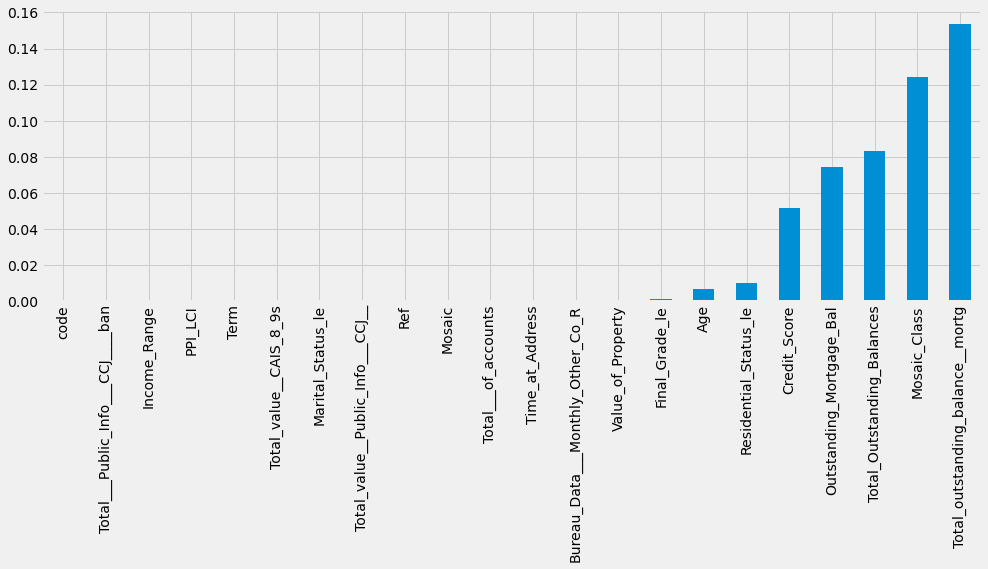

In [1413]:
p_value.plot.bar(figsize=(15,5))
plt.show()

In [1414]:
p_values=p_value[p_value<0.05]
p_values.index

Index(['code', 'Total___Public_Info___CCJ____ban', 'Income_Range', 'PPI_LCI',
       'Term', 'Total_value__CAIS_8_9s', 'Marital_Status_le',
       'Total_value__Public_Info___CCJ__', 'Ref', 'Mosaic',
       'Total___of_accounts', 'Time_at_Address',
       'Bureau_Data___Monthly_Other_Co_R', 'Value_of_Property',
       'Final_Grade_le', 'Age', 'Residential_Status_le'],
      dtype='object')

In [1415]:
X_train = X_train_sc[p_values.index]
X_test =X_test_sc[p_values.index]

In [1416]:
X_train.head(2)

code  Total___Public_Info___CCJ____ban  Income_Range  PPI_LCI      Term  \
0   0.0                               0.0      0.000000      0.0  0.142857   
1   0.0                               0.0      0.333333      0.0  0.102041   

   Total_value__CAIS_8_9s  Marital_Status_le  \
0                     0.0                1.0   
1                     0.0                0.0   

   Total_value__Public_Info___CCJ__       Ref    Mosaic  Total___of_accounts  \
0                               0.0  0.010839  0.353535             0.555556   
1                               0.0  0.522712  0.454545             0.555556   

   Time_at_Address  Bureau_Data___Monthly_Other_Co_R  Value_of_Property  \
0         0.005794                          0.022255           0.036363   
1         0.019699                          0.021472           0.036363   

   Final_Grade_le       Age  Residential_Status_le  
0        0.666667  0.482759                    1.0  
1        0.000000  0.396552                    0.5

In [1417]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=15)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=15)

In [1418]:
y_pred = logmodel.predict(X_test)

In [1419]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_rt = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_rt


Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Logistic Regression  0.937852   0.939676  0.997917  0.967921  0.500983

In [1420]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=15)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=15)

In [1421]:
y_pred = sgd.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_sgd = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_rt= model_rt.append(model_sgd, ignore_index = True)
model_rt

Model  Accuracy  Precision    Recall  F1 Score  \
0          Logistic Regression  0.937852   0.939676  0.997917  0.967921   
1  Stochastic Gradient Descent  0.936628   0.941336  0.994531  0.967203   

        ROC  
0  0.500983  
1  0.515484

In [1422]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [1423]:
y_pred = knn.predict(X_test)

In [1424]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_knn = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_rt = model_rt.append(model_knn, ignore_index = True)
model_rt

Model  Accuracy  Precision    Recall  F1 Score  \
0          Logistic Regression  0.937852   0.939676  0.997917  0.967921   
1  Stochastic Gradient Descent  0.936628   0.941336  0.994531  0.967203   
2          K-Nearest Neighbour  0.938341   0.940570  0.997396  0.968150   

        ROC  
0  0.500983  
1  0.515484  
2  0.508819

In [1425]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)
# Predicting the Test set results
y_pred = scv.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

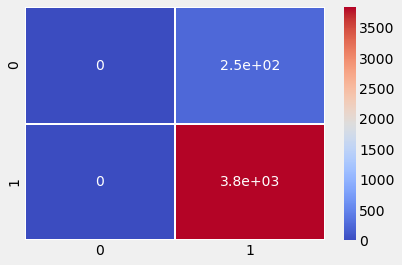

In [1426]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [1427]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_svm = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_rt = model_rt.append(model_svm, ignore_index = True)
model_rt

Model  Accuracy  Precision    Recall  F1 Score  \
0          Logistic Regression  0.937852   0.939676  0.997917  0.967921   
1  Stochastic Gradient Descent  0.936628   0.941336  0.994531  0.967203   
2          K-Nearest Neighbour  0.938341   0.940570  0.997396  0.968150   
3       Support Vector Machine  0.939564   0.939564  1.000000  0.968841   

        ROC  
0  0.500983  
1  0.515484  
2  0.508819  
3  0.500000

In [1428]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [1429]:
y_pred = rfc.predict(X_test)

In [1430]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 196,   51],
       [   3, 3837]], dtype=int64)

In [1431]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_rf = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_rt = model_rt.append(model_rf, ignore_index = True)
model_rt

Model  Accuracy  Precision    Recall  F1 Score  \
0          Logistic Regression  0.937852   0.939676  0.997917  0.967921   
1  Stochastic Gradient Descent  0.936628   0.941336  0.994531  0.967203   
2          K-Nearest Neighbour  0.938341   0.940570  0.997396  0.968150   
3       Support Vector Machine  0.939564   0.939564  1.000000  0.968841   
4       Random tree Classifier  0.986787   0.986883  0.999219  0.993012   

        ROC  
0  0.500983  
1  0.515484  
2  0.508819  
3  0.500000  
4  0.896371

# Market Basket Analysis

In [1432]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [1433]:
dataModel.head(2)

Insurance_Description_le  Total_value__Public_Info___CCJ__  Mosaic  \
0                         3                                 5      46   
1                         2                                 0      16   

   Income_Range  Total_outstanding_balance__mortg  Final_Grade_le  PPI_LCI  \
0             6                                64               0        0   
1             2                                13               0        1   

    code  Marital_Status_le  Total_Outstanding_Balances  Ref  \
0   -1.0                  1                       64406    1   
1  748.0                  3                       31614    3   

   Total___of_accounts  Total___Public_Info___CCJ____ban  Credit_Score  \
0                    6                                 1           918   
1                    8                                 0           903   

   Bureau_Data___Monthly_Other_Co_R  Term  Age  Total_value__CAIS_8_9s  \
0                               513    36   46                       0   
1                               331   120   59                       0   

   Value_of_Property  Residential_Status_le  Mosaic_Class  Time_at_Address  \
0             178000                      0             8              132   
1             180000                      0             3              288   

   Outstanding_Mortgage_Bal  
0                     47679  
1                     11563

In [1434]:
for k, v in encVal.items():
    try: 
        dataModel[k] = dataModel[k + '_le'].replace(v).astype('category')
        del dataModel[k + '_le']
    except: pass
    
del dataModel['Ref']

In [1435]:
_ = dataModel.nunique().reset_index().merge(dataModel.dtypes.reset_index(), on = 'index', how = 'left')
_.columns = ['Variable', 'Distinct Values', 'DTypes']
_ = _.sort_values(by = 'Distinct Values', ascending = False)
_['DTypes'] = _['DTypes'].astype(str)

fig = px.bar(_, x = 'Variable', y = 'Distinct Values', color = 'DTypes', 
                   template = 'simple_white', color_discrete_sequence = px.colors.qualitative.Vivid, 
                   labels = {'sum of Distinct Values': 'Distinct Values'}, text = _['Distinct Values'])
fig.show()

In [1445]:
# ## Creating a basket of income range
basket = pd.crosstab(dataModel[against_what], dataModel['Insurance_Description'])

#The encoding function
def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket = basket.applymap(encode)

   
   1. Support is the percentage of transactions containing a particular combination of items relative to the total number of transactions in the database. The support for the combination A and B would be,
   
   P(AB) or P(A) for Individual A
   
   2. Confidence measures how much the consequent (item) is dependent on the
antecedent (item). In other words, confidence is the conditional probability of the consequent given the antecedent,

    P(B|A)

    where P(B|A) = P(AB)/P(A)
   
   
  3. Lift (also called improvement or impact) is a measure to overcome the
problems with support and confidence. Lift is said to measure the difference — measured in ratio — between the confidence of a rule and the expected confidence. Consider an association rule “if A then B.” The lift for the rule is defined as

    P(B|A)/P(B) or P(AB)/[P(A)P(B)].

  As shown in the formula, lift is symmetric in that the lift for “if A then B” is the same as the lift for “if B then A.”


4. Each criterion has its advantages and disadvantages but in general we would like association rules that have high confidence, high support, and high lift.

In [1446]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

antecedents                      consequents  \
0                                   (LASU)                          (Joint)   
279               (Others, Joint, Missing)                         (Single)   
310           (LASU, Life & Critical Illn)                (Single, Missing)   
309                        (LASU, Missing)   (Single, Life & Critical Illn)   
308                         (LASU, Single)  (Life & Critical Illn, Missing)   
306  (LASU, Life & Critical Illn, Missing)                         (Single)   
305   (LASU, Single, Life & Critical Illn)                        (Missing)   
304                (LASU, Single, Missing)           (Life & Critical Illn)   
502          (Joint, Life & Critical Illn)        (Single, Others, Missing)   
1                                  (Joint)                           (LASU)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.857143            0.857143  0.857143         1.0  1.166667   
279            0.857143            1.000000  0.857143         1.0  1.000000   
310            0.857143            1.000000  0.857143         1.0  1.000000   
309            0.857143            1.000000  0.857143         1.0  1.000000   
308            0.857143            1.000000  0.857143         1.0  1.000000   
306            0.857143            1.000000  0.857143         1.0  1.000000   
305            0.857143            1.000000  0.857143         1.0  1.000000   
304            0.857143            1.000000  0.857143         1.0  1.000000   
502            0.857143            1.000000  0.857143         1.0  1.000000   
1              0.857143            0.857143  0.857143         1.0  1.166667   

     leverage  conviction  
0    0.122449         inf  
279  0.000000         inf  
310  0.000000         inf  
309  0.000000         inf  
308  0.000000         inf  
306  0.000000         inf  
305  0.000000         inf  
304  0.000000         inf  
502  0.000000         inf  
1    0.122449         inf